# Enclosed tessellation experiment

This notebooks is a proof of a concept of enclosed tessellation, i.e. two-step partitioning of space based on building footprints and boundaries (e.g. street network, railway). 

## Load data


In [1]:
import os

import geopandas as gpd

from sqlalchemy import create_engine

user = os.environ.get('DB_USER')
pwd = os.environ.get('DB_PWD')
host = os.environ.get('DB_HOST')
port = os.environ.get('DB_PORT')

db_connection_url = f"postgres+psycopg2://{user}:{pwd}@{host}:{port}/built_env"
engine = create_engine(db_connection_url)

## Enclosed tessellation toy example

In [2]:
x, y = 352125.32, 492802.86  # coordinates in epsg 27700
buffer = 5000  # radius in [m]

In [3]:
sql = f'SELECT * FROM openroads_200803_topological WHERE ST_Intersects(geometry, ST_Buffer(ST_SetSRID(ST_Point({x}, {y}), 27700), {buffer}))'

roads = gpd.read_postgis(sql, engine, geom_col='geometry')

sql = f'SELECT * FROM openmap_buildings_200814 WHERE ST_DWithin(geometry, ST_SetSRID(ST_Point({x}, {y}), 27700), {buffer})'

buildings = gpd.read_postgis(sql, engine, geom_col='geometry')

In [4]:
from dask.distributed import Client

In [5]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:37641 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 8.35 GB


In [4]:
from tessellation import enclosed_tessellation
from shapely.geometry import Point
import warnings

warnings.filterwarnings('always')

In [5]:
# assign unique IDs
buildings['uID'] = range(len(buildings))

# get road-based polygons
limit = Point(x, y).buffer(buffer)

In [6]:
res = enclosed_tessellation(roads, buildings, limit, unique_id="uID")

<AxesSubplot:>

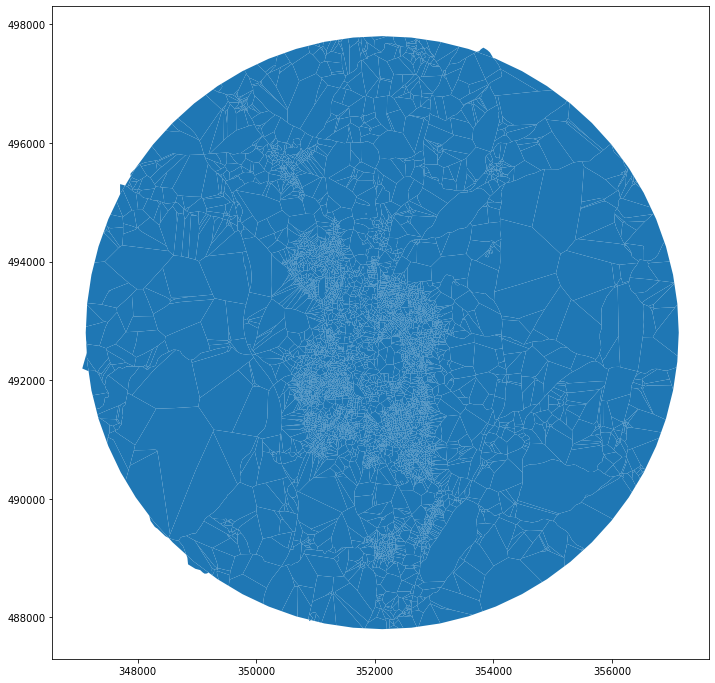

In [10]:
res.plot(figsize=(12, 12))

In [8]:
client.close()

NameError: name 'client' is not defined